In [1]:
import os
import json

In [2]:

import nibabel as nib
import numpy as np
import nrrd
import matplotlib.pyplot as plt

In [3]:
from monai.apps.auto3dseg import AutoRunner

2024-04-05 18:51:40.761993: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 18:51:42.492924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:

from monai.config import print_config
from monai.data import create_test_image_3d

print_config()

MONAI version: 1.3.0
Numpy version: 1.26.3
Pytorch version: 2.1.2+cu121
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 865972f7a791bf7b42efbcd87c8402bd865b329e
MONAI __file__: /cluster/home/<username>/.conda/envs/tdt4265/lib/python3.10/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.2.1
scikit-image version: 0.22.0
scipy version: 1.12.0
Pillow version: 10.2.0
Tensorboard version: 2.16.2
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.16.2+cu121
tqdm version: 4.66.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.8
pandas version: 1.2.4
einops version: 0.7.0
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: 1.0.0
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the option

In [22]:
# nrrd version:

sim_datalist = {
    "testing": [
        {"image": "./CTCA/Normal_1.nrrd", "label": "./Annotations/Normal_1.nrrd"},
    ],
    "training": [
        {"fold": 0, "image": "./CTCA/Normal_1.nrrd", "label": "./Annotations/Normal_2.nrrd"},
        {"fold": 1, "image": "./CTCA/Normal_3.nrrd", "label": "./Annotations/Normal_3.nrrd"},
        {"fold": 2, "image": "./CTCA/Normal_4.nrrd", "label": "./Annotations/Normal_4.nrrd"},
    ],
}

# nifti version:
# sim_datalist = {
#     "testing": [
#         {"image": "test_image_001.nii.gz", "label": "test_label_001.nii.gz"},
#         {"image": "test_image_002.nii.gz", "label": "test_label_002.nii.gz"},
#     ],
#     "training": [
#         {"fold": 0, "image": "tr_image_001.nii.gz", "label": "tr_label_001.nii.gz"},
#         {"fold": 0, "image": "tr_image_002.nii.gz", "label": "tr_label_002.nii.gz"},
#         {"fold": 0, "image": "tr_image_003.nii.gz", "label": "tr_label_003.nii.gz"},
#         {"fold": 0, "image": "tr_image_004.nii.gz", "label": "tr_label_004.nii.gz"},
#         {"fold": 1, "image": "tr_image_005.nii.gz", "label": "tr_label_005.nii.gz"},
#         {"fold": 1, "image": "tr_image_006.nii.gz", "label": "tr_label_006.nii.gz"},
#         {"fold": 1, "image": "tr_image_007.nii.gz", "label": "tr_label_007.nii.gz"},
#         {"fold": 1, "image": "tr_image_008.nii.gz", "label": "tr_label_008.nii.gz"},
#         {"fold": 2, "image": "tr_image_009.nii.gz", "label": "tr_label_009.nii.gz"},
#         {"fold": 2, "image": "tr_image_010.nii.gz", "label": "tr_label_010.nii.gz"},
#         {"fold": 2, "image": "tr_image_011.nii.gz", "label": "tr_label_011.nii.gz"},
#         {"fold": 2, "image": "tr_image_012.nii.gz", "label": "tr_label_012.nii.gz"},
#     ],
# }

# sim_dim = (64, 64, 64)

In [23]:
work_dir = "./helloworld_work_dir"
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

dataroot_dir = os.path.join(work_dir, "sim_dataroot")
if not os.path.isdir(dataroot_dir):
    os.makedirs(dataroot_dir)

datalist_file = os.path.join(work_dir, "sim_datalist.json")
with open(datalist_file, "w") as f:
    json.dump(sim_datalist, f)

# for d in sim_datalist["testing"] + sim_datalist["training"]:
#     im, seg = create_test_image_3d(
#         sim_dim[0], sim_dim[1], sim_dim[2], rad_max=10, num_seg_classes=1, random_state=np.random.RandomState(42)
#     )
#     image_fpath = os.path.join(dataroot_dir, d["image"])
#     label_fpath = os.path.join(dataroot_dir, d["label"])


#     # nifti version:
#     # nib.save(nib.Nifti1Image(im, affine=np.eye(4)), image_fpath)
#     # nib.save(nib.Nifti1Image(seg, affine=np.eye(4)), label_fpath)


#     # nrrd version:
#     nifti_image = nib.Nifti1Image(im, affine=np.eye(4))
#     header = {'space': 'left-posterior-superior', 
#           'space directions': '(0.38671898840000002,0,0) (0,0.38671898840000002,0) (0,0,0.625)'}
#     nrrd.write(image_fpath, im, header)
#     nifti_image = nib.Nifti1Image(im, affine=np.eye(4))
#     header = {'space': 'right-anterior-superior'}  # You can adjust the header as needed
#     nrrd.write(label_fpath, seg, header)

In [24]:
# img_nib = nib.load(os.path.join(dataroot_dir, sim_datalist["testing"][0]["image"]))
# lbl_nib = nib.load(os.path.join(dataroot_dir, sim_datalist["testing"][0]["label"]))
# img = np.array(img_nib.dataobj)
# lbl = np.array(lbl_nib.dataobj)

nrrd_data, nrrd_header = nrrd.read(os.path.join(dataroot_dir, sim_datalist["testing"][0]["image"]))
img = np.array(nrrd_data)
nrrd_data, nrrd_header = nrrd.read(os.path.join(dataroot_dir, sim_datalist["testing"][0]["label"]))
lbl = np.array(nrrd_data)

plt.subplot(1, 2, 1)
plt.imshow(img[32])
plt.title("image")
cbar = plt.colorbar(shrink=0.55)
plt.subplot(1, 2, 2)
plt.imshow(lbl[32])
plt.title("label")
cbar = plt.colorbar(shrink=0.55)

FileNotFoundError: [Errno 2] No such file or directory: '/Normal/CTCA/Normal_1.nrrd'

In [11]:
runner = AutoRunner(
    work_dir=work_dir,
    input={
        "modality": "CT",
        "datalist": datalist_file,
        "dataroot": dataroot_dir,
        
    },
)

2024-04-05 18:55:12,089 - INFO - AutoRunner using work directory ./helloworld_work_dir
2024-04-05 18:55:12,091 - INFO - Setting num_fold 3 based on the input datalist /cluster/work/felixzr/TDT4265_StarterCode_2024/pytorch-lightning-template/nnUnet_git_tut/helloworld_work_dir/sim_datalist.json.
2024-04-05 18:55:12,374 - INFO - Using user defined command running prefix , will override other settings


In [16]:
max_epochs = 2

train_param = {
    "num_epochs_per_validation": 1,
    "num_images_per_batch": 1,
    "num_epochs": max_epochs,
    "num_warmup_epochs": 1,
}
runner.set_training_params(train_param)
runner.set_num_fold(num_fold=1)

In [17]:
settings = {'range_num_images_per_batch': [1, 1], 'range_num_sw_batch_size': [1, 1]}
runner.set_gpu_customization(settings)

runner.run()

2024-04-05 18:57:04,880 - INFO - Skipping data analysis...
2024-04-05 18:57:04,881 - INFO - Skipping algorithm generation...
2024-04-05 18:57:04,882 - INFO - Skipping algorithm training...


2024-04-05 18:57:04,882 - INFO - Ensembling using single GPU!
2024-04-05 18:57:04,883 - INFO - The output_dir is not specified. /cluster/work/felixzr/TDT4265_StarterCode_2024/pytorch-lightning-template/nnUnet_git_tut/helloworld_work_dir/ensemble_output will be used to save ensemble predictions.


ValueError: Could not find the trained results in /cluster/work/felixzr/TDT4265_StarterCode_2024/pytorch-lightning-template/nnUnet_git_tut/helloworld_work_dir. Possibly the required training step was not completed.

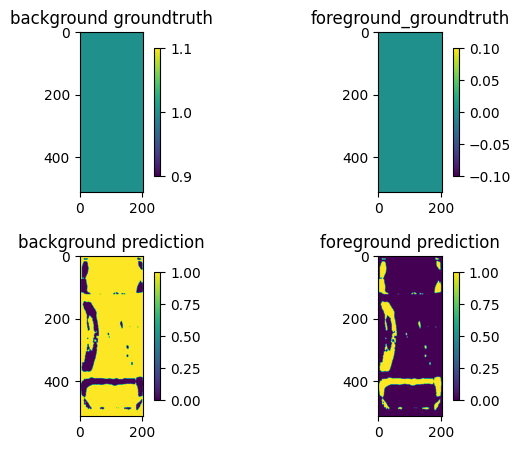

In [15]:
image_name = sim_datalist["testing"][0]["image"].split(".")[0]
prediction_nib = nib.load(os.path.join(work_dir, "ensemble_output", image_name + "_ensemble" + ".nii.gz"))
pred = np.array(prediction_nib.dataobj)

img_slice32 = lbl[32] == 0
label_slice32 = lbl[32] == 1
background_slice32 = pred[32, :, :, 0] if pred.ndim == 4 else pred[32] == 0
foreground_slice32 = pred[32, :, :, 1] if pred.ndim == 4 else pred[32] == 1

plt.subplot(2, 2, 1)
plt.imshow(img_slice32)
plt.title("background groundtruth")
cbar = plt.colorbar(shrink=0.8)
plt.subplot(2, 2, 2)
plt.imshow(label_slice32)
plt.title("foreground_groundtruth")
cbar = plt.colorbar(shrink=0.8)
plt.subplot(2, 2, 3)
plt.imshow(background_slice32)
plt.title("background prediction")
cbar = plt.colorbar(shrink=0.8)
plt.subplot(2, 2, 4)
plt.imshow(foreground_slice32)
plt.title("foreground prediction")
cbar = plt.colorbar(shrink=0.8)
# set the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()
